In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"/content/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
col_names = df.columns
col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [6]:
df['label'].replace('male',1,inplace=True)
df['label'].replace('female',0,inplace=True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
round(df.describe(),2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,...,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.0
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,...,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17,0.5
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,...,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12,0.5
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,...,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00,0.0
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,...,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10,0.0
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,...,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14,0.5
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,...,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21,1.0
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,...,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93,1.0


In [10]:
X = df.drop(['label'], axis=1)
y = df['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
807,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,0.186526,0.180360,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314
2495,0.185643,0.065043,0.203955,0.186017,0.223454,0.037437,2.732155,11.206323,0.898330,0.476308,0.199666,0.185643,0.175833,0.048241,0.275862,1.077674,0.023438,6.023438,6.000000,0.086686
2529,0.203908,0.045961,0.201869,0.177944,0.239626,0.061682,2.247859,10.481790,0.898687,0.358451,0.177944,0.203908,0.169617,0.047291,0.274286,1.265126,0.023438,8.554688,8.531250,0.084143
2241,0.115789,0.081103,0.102197,0.038124,0.193181,0.155057,1.620439,6.600749,0.962574,0.746873,0.017620,0.115789,0.200910,0.075829,0.258065,0.452257,0.007812,1.578125,1.570312,0.250933
2981,0.179889,0.067810,0.163096,0.137244,0.246925,0.109681,2.106748,8.030296,0.932428,0.551025,0.156253,0.179889,0.136662,0.033898,0.277778,0.963949,0.043945,3.999023,3.955078,0.261785


In [13]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Creating Classifier

In [14]:
model=SVC()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with default hyperparameters: 0.9826


In [15]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


In [16]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


In [17]:
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9763


In [18]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9763


In [19]:
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


In [20]:
poly_svc=SVC(kernel='poly', C=1.0)

poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9716


In [21]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9763


In [22]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8281


In [23]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8202


In [24]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.9826
Model Train Accuracy : 0.9858


### Creating correlation graph

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[293   4]
 [  7 330]]

True Positives(TP) =  293

True Negatives(TN) =  330

False Positives(FP) =  4

False Negatives(FN) =  7


<Axes: >

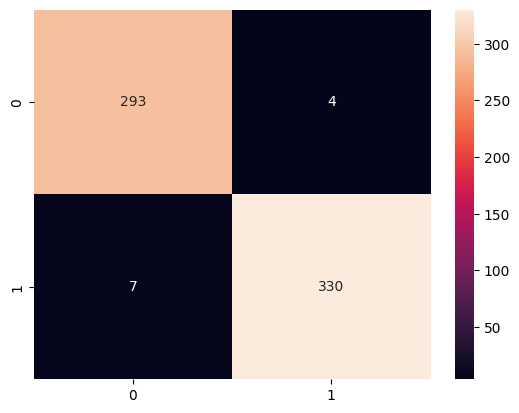

In [26]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [28]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9826
Classification error : 0.0174
Precision : 0.9865
Recall or Sensitivity : 0.9767
True Positive Rate : 0.9767
False Positive Rate : 0.0120
Specificity : 0.9880


In [29]:
!pip install -U scikit-learn
!conda update scikit-learn

/bin/bash: line 1: conda: command not found


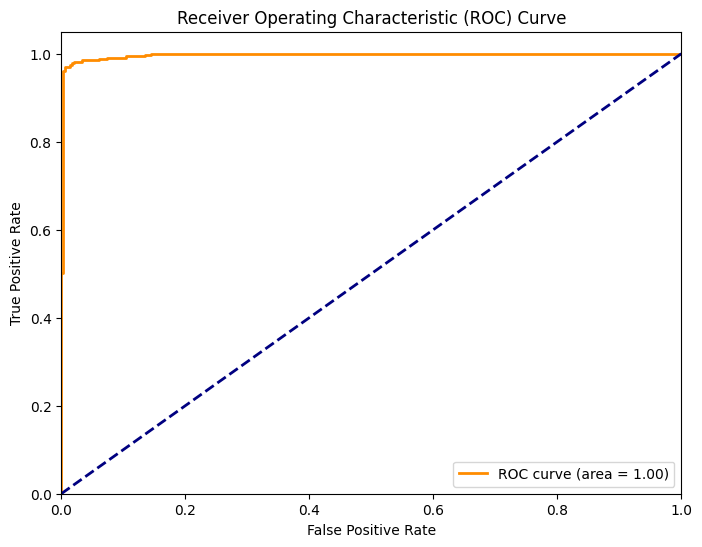

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9829


In [32]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9921


### K-FOld Variation

In [33]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))


print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.92744479 0.92113565 0.91798107 0.9178515  0.9178515 ]
Average stratified cross-validation score with linear kernel:0.9205


In [34]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.67981073 0.70820189 0.65457413 0.66824645 0.65244866]
Average stratified cross-validation score with rbf kernel:0.6727


In [35]:
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]


grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [36]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :', (grid_search.best_estimator_))

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))


GridSearch CV best score : 0.9815


Parameters that give the best results : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : SVC(C=10, gamma=0.1)

GridSearch CV score on test set: 0.9842


In [37]:
##Identification Of Language
!pip install keras

In [38]:
!pip install tensorflow

In [39]:
!pip install librosa

In [40]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, RepeatVector, Reshape, Concatenate, UpSampling2D
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split

In [41]:
def batch_generator(for_train, batch_size):
    while True:
        if for_train is True:
            idx = np.random.randint(0, paths_train.shape[0], batch_size)
        else:
            idx = np.random.randint(0, paths_valid.shape[0], batch_size)

        x = np.zeros((batch_size, 39, 1001, 1))
        y = np.zeros((batch_size, 3))
        for i in range(batch_size):
            if for_train is True:
                audio, sr = librosa.load(paths_train[idx[i]], sr=16000)
                y[i] = y_train[idx[i]]
            else:
                audio, sr = librosa.load(paths_valid[idx[i]], sr=16000)
                y[i] = y_valid[idx[i]]

            mfcc = librosa.feature.mfcc(audio, sr=sr, n_mfcc=40, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            if mfcc.shape[1] < 1001:
                mfcc = np.concatenate((mfcc, np.zeros((mfcc.shape[0], 1001-mfcc.shape[1]))), axis=1)
            else:
                mfcc = mfcc[:, 0:1001]
            x[i, :, :, 0] = mfcc[1:]

        yield x, y

In [42]:
input = Input(shape=(39, 1001, 1))
temp = Conv2D(24, (6, 6), activation='relu')(input)
temp = AveragePooling2D((2,2))(temp)
temp = Conv2D(24, (6, 6), activation='relu')(temp)
temp = AveragePooling2D((2,2))(temp)
temp = Conv2D(24, (6, 6), activation='relu')(temp)
temp = AveragePooling2D((1,141))(temp)
output = Dense((3), activation='softmax')(temp)
output = Reshape((3,))(output)
print(output)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")


In [43]:
model = Model(inputs=input, outputs=output)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
train_gen = batch_generator(True, batch_size=128)
valid_gen = batch_generator(False, batch_size=128)

In [44]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [45]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [46]:
df=pd.read_csv(r"/content/dataset.csv")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [47]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [48]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [49]:
x = np.array(df["Text"])
y = np.array(df["language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [50]:
##Evaulating the model
model.score(X_test,y_test)

0.953168044077135